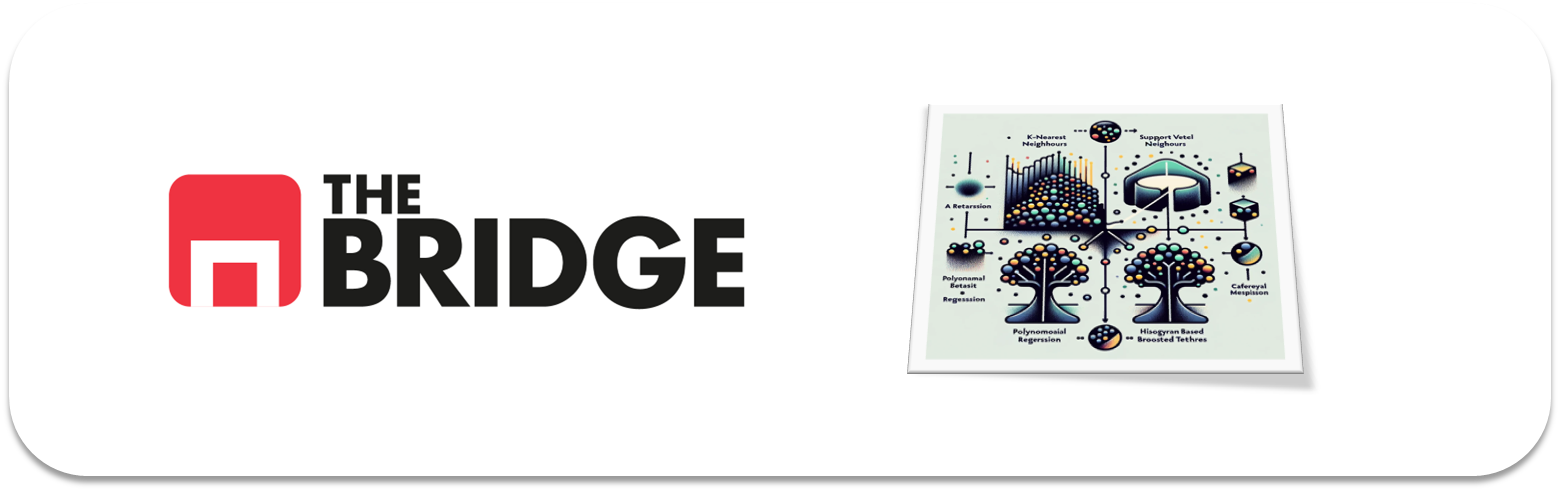

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import ML_tool_box_basic_plot as tbb


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinto y blanco del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df_vino = pd.read_csv("./data/wines_dataset.csv", sep= "|")

In [3]:
df_vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [4]:
df_vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
tbb.ALL_describe_features(df_vino)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,fixed acidity,float64,6497,0,0.0,106,1.63,Numérica Discreta
1,volatile acidity,float64,6497,0,0.0,187,2.88,Numérica Discreta
2,citric acid,float64,6497,0,0.0,89,1.37,Numérica Discreta
3,residual sugar,float64,6497,0,0.0,316,4.86,Numérica Discreta
4,chlorides,float64,6497,0,0.0,214,3.29,Numérica Discreta
5,free sulfur dioxide,float64,6497,0,0.0,135,2.08,Numérica Discreta
6,total sulfur dioxide,float64,6497,0,0.0,276,4.25,Numérica Discreta
7,density,float64,6497,0,0.0,998,15.36,Numérica Discreta
8,pH,float64,6497,0,0.0,108,1.66,Numérica Discreta
9,sulphates,float64,6497,0,0.0,111,1.71,Numérica Discreta


In [6]:
target_clas = "quality"
target_regre = "alcohol"

### Target para clasificacion

- "quality"

Es un target desbalanceado. Tendremos que arreglarlo más adelante.

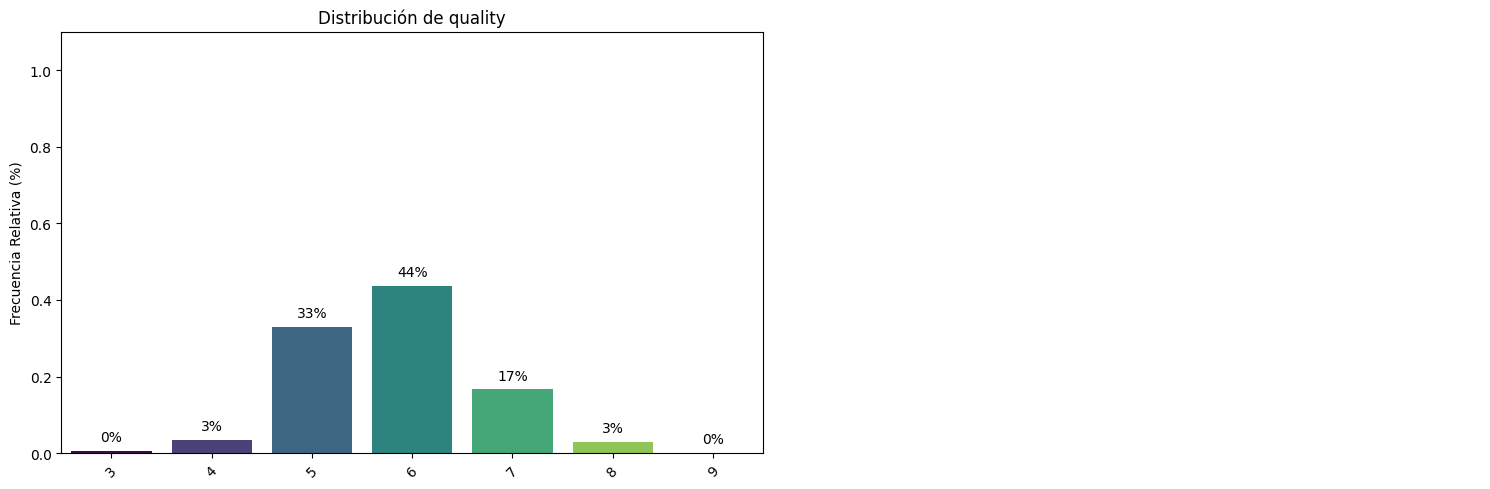

In [7]:
tbb.Uni_Cat_bar_plot(df_vino,[target_clas], mostrar_valores=True, relativa=True)

### Target para regresión

- "alcohol"

No tiene mala pinta. Tiene pocos outliers y no es el tipico de larga cola.

(2,)


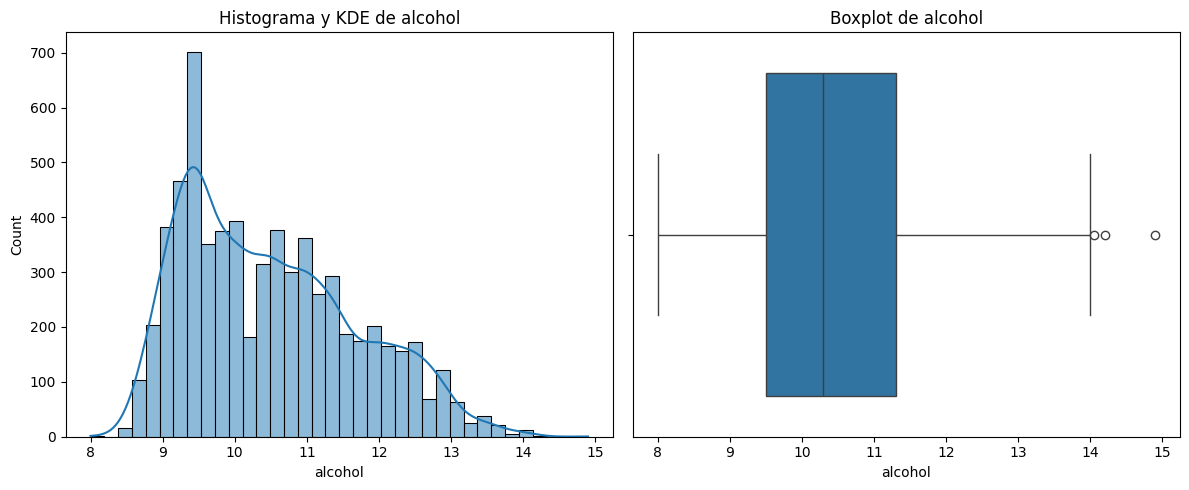

In [8]:
tbb.Uni_Num_hist_box_plot(df_vino,[target_regre])

### #2 Análisis y transformaciones previo modelado - CLASIFICACIÓN

### 2.1 Análisis features

In [9]:
df_vino.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


In [10]:
df_vino.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

- Numericas:

En una primera revision se puede decir que son numericas todas menos una, y sin tener una gran cardinalidad, todas menos "residual sugar", que tiene 89 valores, el resto pasa de los 100 e incluso mucho mas.    
Por este motivo vamos a coger todo este grupo como numericas. Si tras el analisis univariante y bivariante se tuviera que tomar otra decision, la lista seria modificada (pero seria muy raro).    
 
`lista_num = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']`

- Catgoricas:

Luego solo nos queda una feature mas que ya de por si es de tipo categorica y encima binaria --> 'class'.
Tendremos que codificarla son one-hot-encoder para pasarla a numerica.

`lista_cat = ['class']`


In [11]:
feature_num = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
feature_cat = ['class']

### 2.2 Análisis Univariante

#### Numéricas

Se observan distribuciones correctas, aunque hay pequeños outliers que dsplazan la distribucion a la izquierda, pareciendo que vayan a necesitar una transformacion logaritmica.    
Si se trabajaran los outliers creo que en muchas de ellas no haria falta.
De todas maneras, le aplicaemos la transformacion y veremos como quedan.

(11, 2)


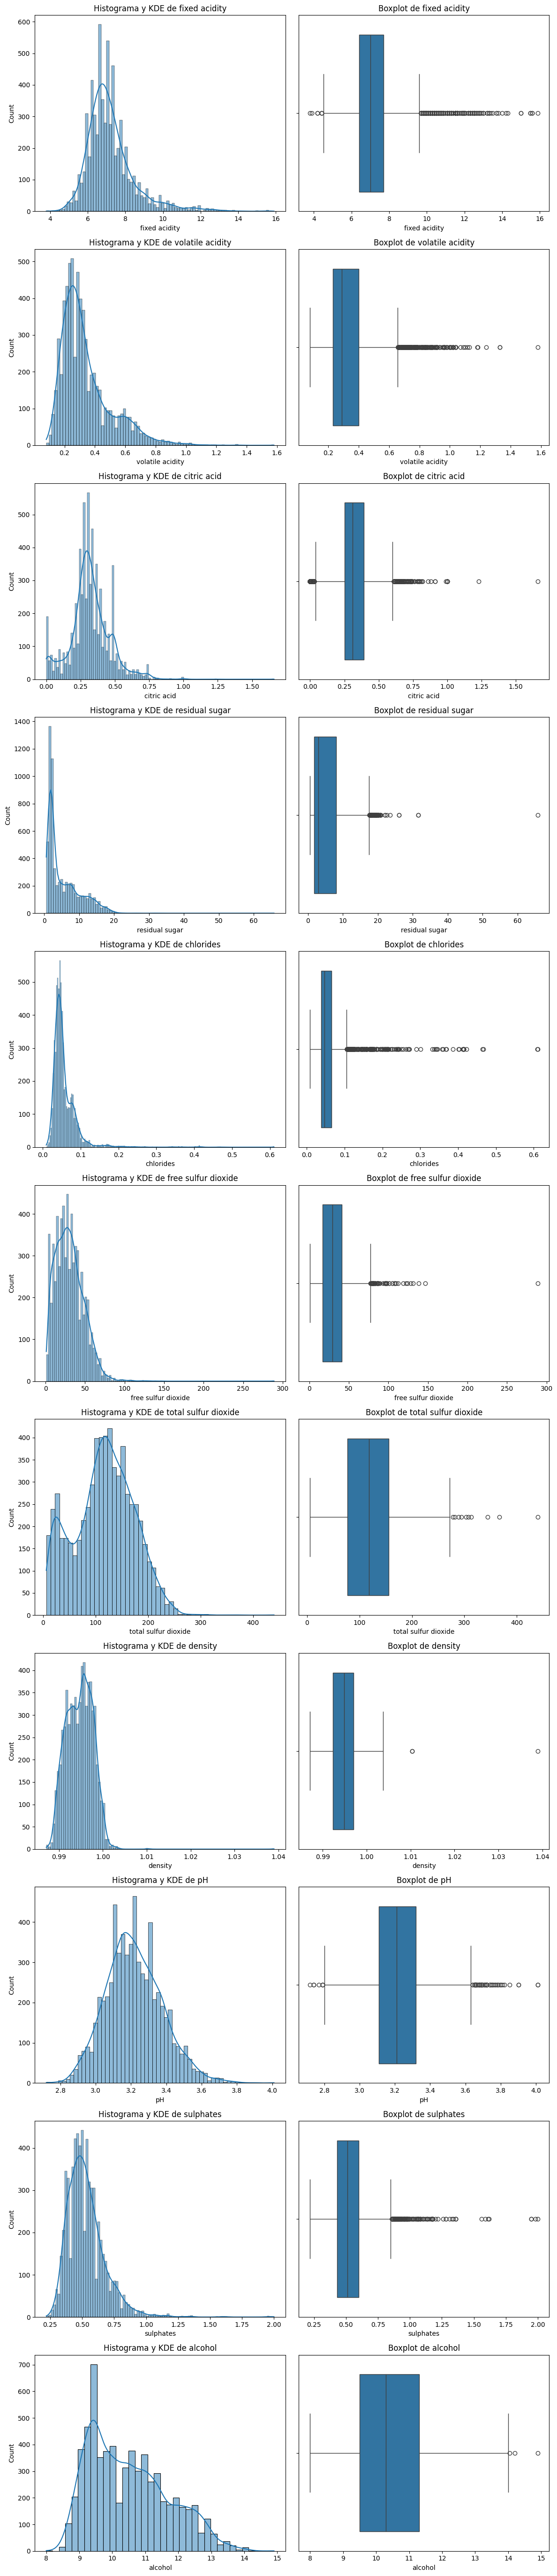

In [12]:
tbb.Uni_Num_hist_box_plot(df_vino, feature_num )

#### Correlacion entre features

Se comprueba las relaciones entre las propias features numericas y se ve que hay una relacion importante entre el "total sulfur dioxide" y el "free sulfur dioxide".   
No acabo de saber si seria posible eliminar unad e las dos, ni cual de ellas es mas relevante, habria que hablar con negocio, pero al menos me sirve para poder tener mas control de las features por si en algun otro momento si que hay una colinealidad lo suficientemente fuerte como para ser eliminada una feature.

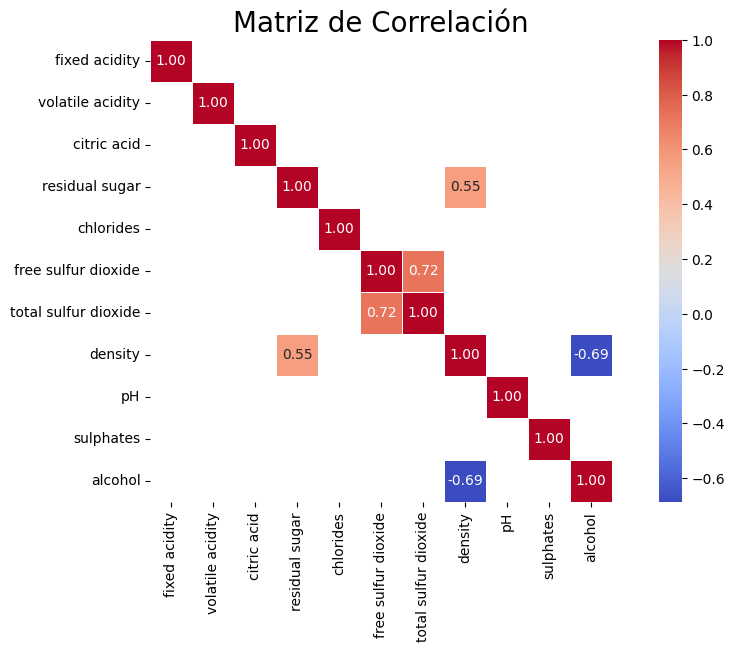

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0,-,-,-,-,-,-,-,-,-,-
volatile acidity,-,1.0,-,-,-,-,-,-,-,-,-
citric acid,-,-,1.0,-,-,-,-,-,-,-,-
residual sugar,-,-,-,1.0,-,-,-,0.552517,-,-,-
chlorides,-,-,-,-,1.0,-,-,-,-,-,-
free sulfur dioxide,-,-,-,-,-,1.0,0.720934,-,-,-,-
total sulfur dioxide,-,-,-,-,-,0.720934,1.0,-,-,-,-
density,-,-,-,0.552517,-,-,-,1.0,-,-,-0.686745
pH,-,-,-,-,-,-,-,-,1.0,-,-
sulphates,-,-,-,-,-,-,-,-,-,1.0,-


In [13]:
tbb.corr_features_num(df_vino, feature_num, umbral=0.5)

#### Categóricas

Poco que decir aqui. Quiza que esta desbalanceada y podriamos forzar que en el split, tanto el train como el test mantuvieran esta proporcion para ser mas optimo el entrenamiento del modelo.

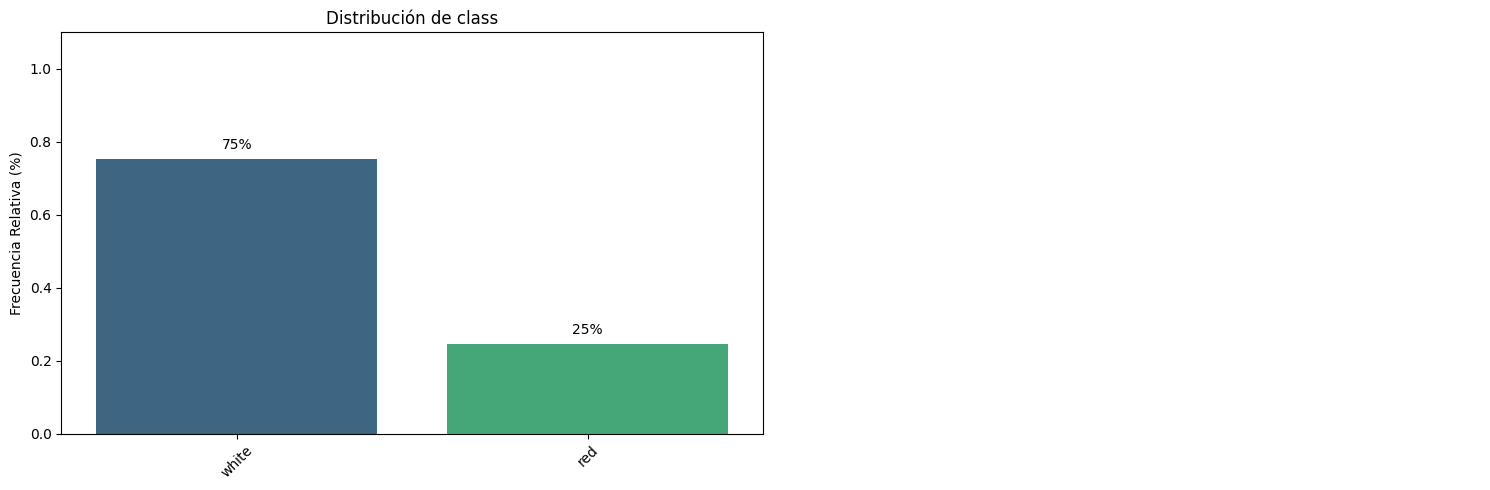

In [14]:
tbb.Uni_Cat_bar_plot(df_vino,feature_cat,relativa=True, mostrar_valores=True)

### 2.3 Análisis Bivariante

#### Numéricas 

Vamos a analizar las variables que consideramos que aportan informacion debido a cruces entre sus KDE o por tener formas diferentes:

- fixes acidity --> Las lineas se cruzan en varias de sus clases, aunque sus formas son parecidas, quitando de la do las frecuancias. Pero nos la quedamos.    
- volatile acidity --> Me gusta. hay cruce de lineas, subidas y bajadas e una misma KDE y las formas entre ellas no son iuales.    
- citric acid --> Muy parecida a la descripcion de la anterior. Nos la quedamos.    
- residual sugar --> Parece mas de lo que es creo, pero nos la quedamos por sus pequeños cruces y por las difrencias en sus KDE en la zona de las colas.    
- chlorides --> Muy buena. Cruces clave que ayudaran muchos al modelo.    
- free sulfur dioxide --> Tambien me gusta. Formas de sus KDEs difentes y varios cruces, uno de ellos muy claro para que el modelo pueda separar corectamente.    
- sulfur dioxide --> Muy parecida a la enterior. Nos la quedamos.    
- density --> Muy buena, me encanta. Muchos cruces que separan comportamientos.    
- ph --> Quiza la que menos info nos va a dar, por su bajo rango (eso creo yo), pero aun asi nos la quedaremos.    
- sulphates --> Bastantes cruces. Nos la quedamos.    
- alcohol --> Me encanta, no hay mas que decir.    

Asi que pleno en las features, todas nos las quedamos.

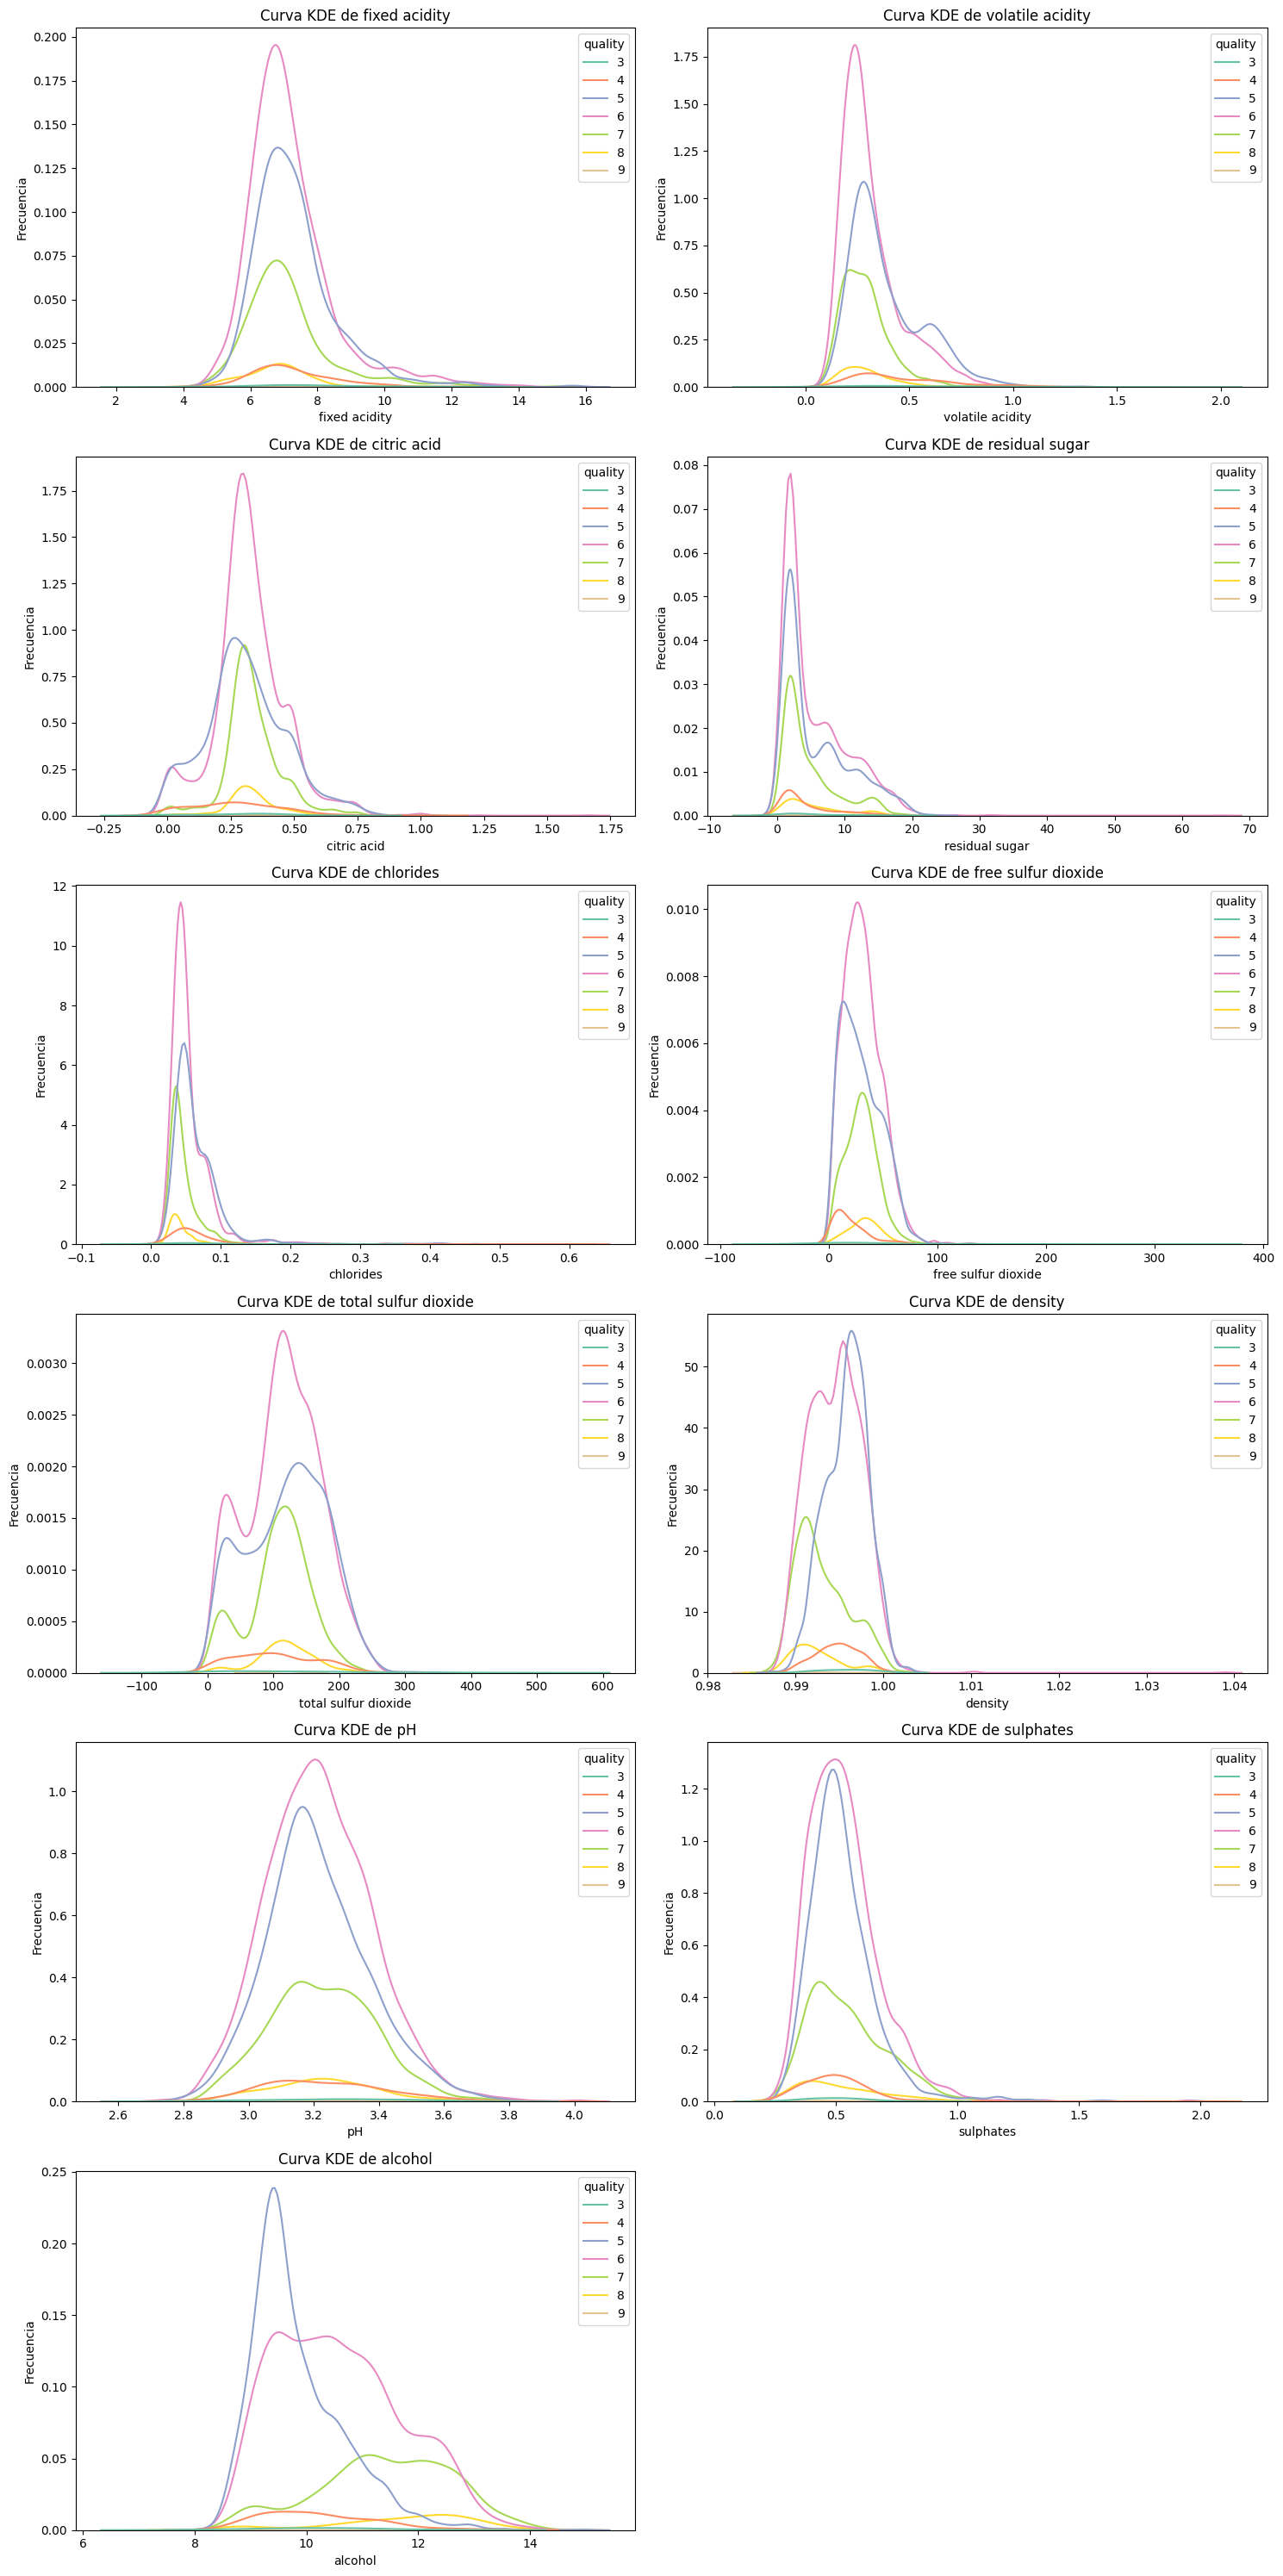

In [15]:
tbb.CLASI_BI_FeaNum_hist_kde_plot(df_vino, feature_num, target_clas, show_kde_only=True)

#### Categóricas

Se puede observar como claramente el vino tinto (red) va decreciendo en frecuencia conforme aumenta la calidad, es decir, hay pocos vinos tintos de mucha calidad y mas de baja calidad (comparandolo consigo mismo)   
Luego, el vino blanco tiene la tendencia opuesta.   
Si las barras fueran iguales en todas las calidades nos deshariamos de esta feature, pero al tener tendencias opuestas, nos la vamos a quedar, pues la clase de vino si que impacta en la calidad que se le va a dar.

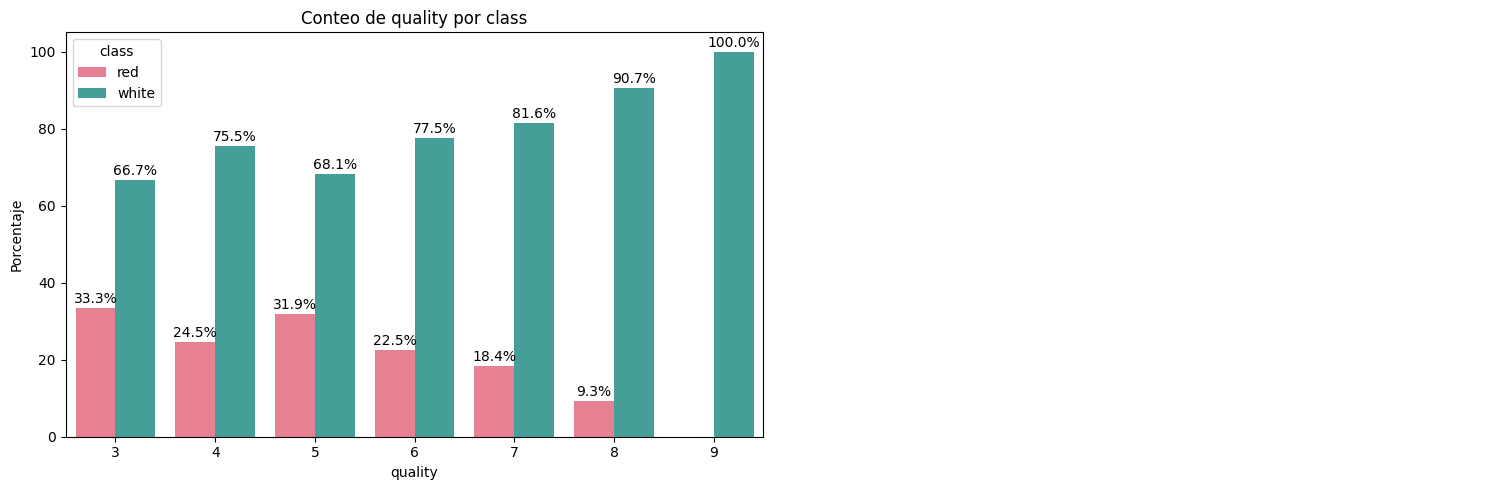

In [16]:
tbb.CLASI_BI_FeaCat_bar_plot(df_vino,target_clas,feature_cat, show_percentage=True)

### Conclusiones variables:

Aunque hay modelos, como los arboles de decision que no precisan de estandarizacion, hay otro que si, por lo que vamos a estandarizar las variables.

- Aplicar transformación logaritmica --> ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total_sulfur dioxide", "density", "sulphates"]
- Aplicar estandarizacion --> Todas

### 2.4 Split Train/Test - X e y

In [17]:
from sklearn.model_selection import train_test_split

X_class = df_vino.drop(columns=target_clas)
y_class = df_vino[target_clas]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.20, random_state=42, stratify=y_class)

In [18]:
X_test_class

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
6418,8.5,0.180,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,red
3568,8.0,0.240,0.48,6.80,0.047,13.0,134.0,0.99616,3.23,0.70,10.0,white
1938,8.0,0.430,0.36,2.30,0.075,10.0,48.0,0.99760,3.34,0.46,9.4,red
1959,6.7,0.310,0.42,6.40,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,white
4599,6.0,0.200,0.25,2.00,0.041,30.0,95.0,0.99078,3.27,0.56,11.1,white
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,7.4,0.320,0.27,12.90,0.040,60.0,221.0,0.99831,3.05,0.66,9.4,white
6095,5.8,0.320,0.31,2.70,0.049,25.0,153.0,0.99067,3.44,0.73,12.2,white
2753,6.6,0.330,0.40,2.65,0.041,35.0,86.0,0.98916,3.11,0.39,13.3,white
3609,6.2,0.350,0.29,7.30,0.044,56.0,244.0,0.99560,3.36,0.55,10.0,white


### 2.5 Transformación de variables

### Numéricas --> Aplicar transformacion logarítmica

In [19]:
feature_num_log = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "sulphates"]

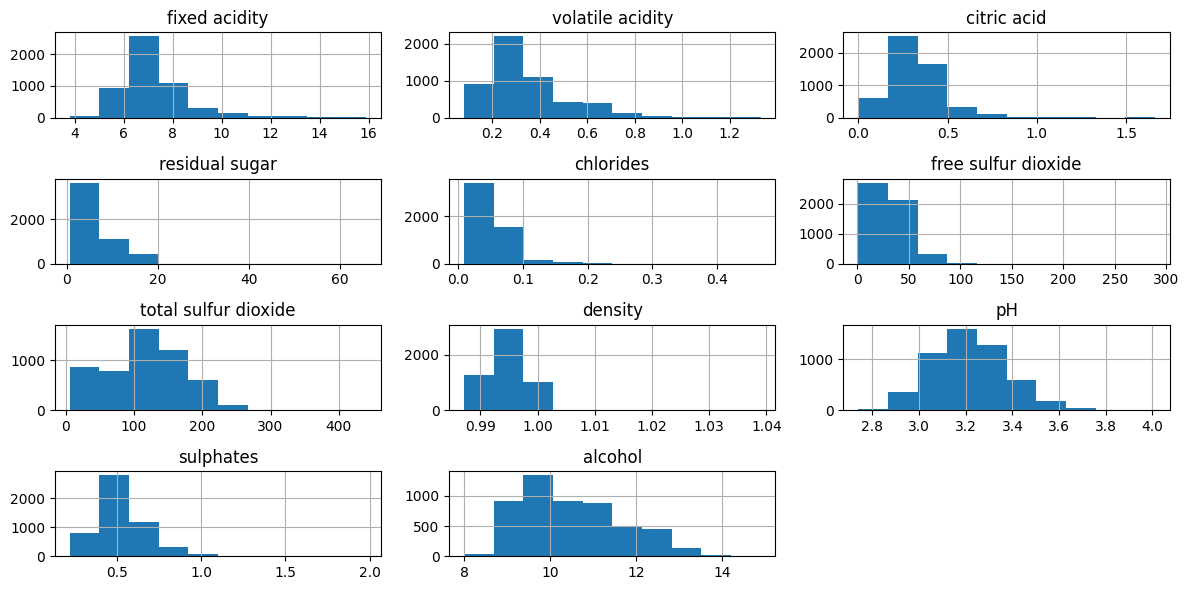

In [20]:
X_train_class[feature_num].hist(figsize=(12,6));
plt.tight_layout()

Citric acid es la unica que empieza en 0, por lo que le sumaremos 1.

In [21]:
for col in feature_num_log:
    if col == "citric acid":
        X_train_class[col] = np.log(X_train_class[col]+1)
        X_test_class[col] = np.log(X_test_class[col]+1)
    else:
        X_train_class[col] = np.log(X_train_class[col]+1)
        X_test_class[col] = np.log(X_test_class[col]+1)

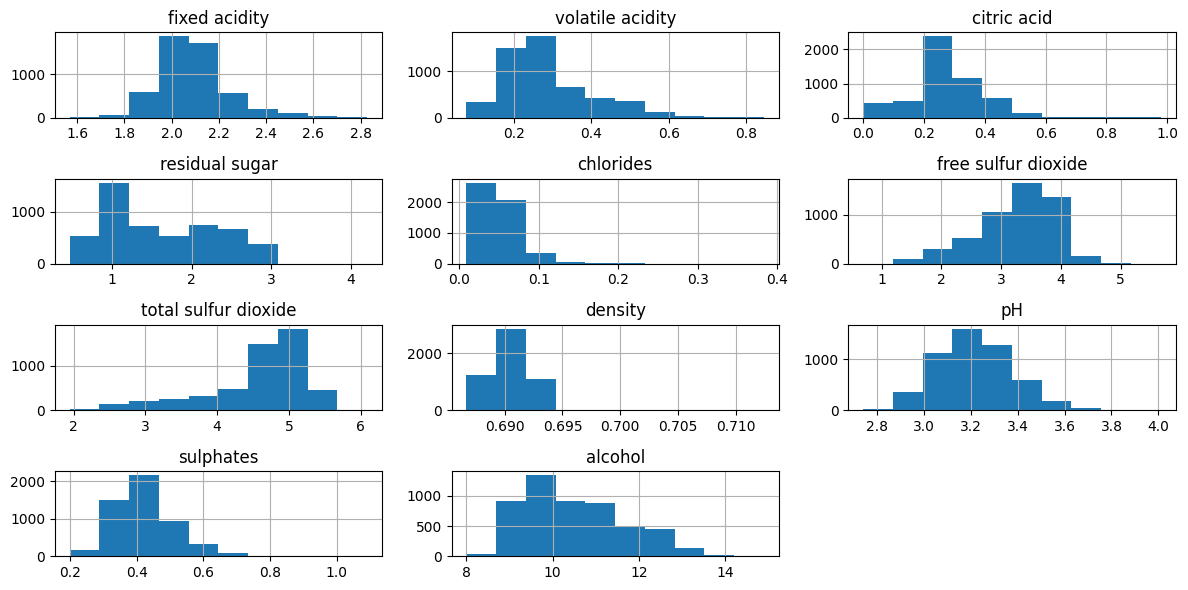

In [22]:
X_train_class[feature_num].hist(figsize=(12,6));
plt.tight_layout()

### Numéricas --> Estandarización

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_class[feature_num] = std_scaler.fit_transform(X_train_class[feature_num])

# A test tambien, pero con transform solo:

X_test_class[feature_num] = std_scaler.transform(X_test_class[feature_num])

In [24]:
X_train_class.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,1.031565e-15,2.679746e-16,-2.597713e-16,-3.910241e-16,-2.871156e-17,1.295438e-15,7.348792e-17,-3.682668e-14,1.855314e-15,3.650470e-16,2.153367e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-3.623380e+00,-1.827180e+00,-2.455898e+00,-1.683349e+00,-1.495096e+00,-3.938241e+00,-3.784871e+00,-2.540929e+00,-2.998152e+00,-2.453154e+00,-2.091556e+00
25%,-6.496858e-01,-6.853518e-01,-4.988061e-01,-8.652571e-01,-5.541751e-01,-5.820597e-01,-3.229686e-01,-7.759213e-01,-6.773170e-01,-7.066856e-01,-8.257193e-01
50%,-1.141048e-01,-2.671917e-01,8.194973e-04,-3.438406e-01,-2.675045e-01,1.982081e-01,2.836181e-01,6.988473e-02,-5.006434e-02,-1.081009e-01,-1.506063e-01
75%,4.621452e-01,4.512516e-01,5.401203e-01,8.577968e-01,2.985173e-01,7.121573e-01,6.815653e-01,7.550629e-01,6.399136e-01,5.285174e-01,6.932851e-01
max,5.023635e+00,4.923598e+00,6.444950e+00,3.771953e+00,1.093250e+01,3.663541e+00,2.164663e+00,1.456620e+01,4.967957e+00,7.367319e+00,3.731294e+00


### Categóricas --> Codificación binaria --> One-hot-encoder

In [25]:
X_train_class = pd.get_dummies(X_train_class, columns=feature_cat, dtype= int)
X_train_class

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class_red,class_white
5077,1.487206,-0.404377,0.070006,-1.285814,-0.778865,-0.761969,0.635089,-0.376194,-1.179119,-0.861565,0.102561,0,1
3917,4.647686,-0.829285,0.861639,-0.670050,0.608854,-1.334300,-1.956895,1.768229,-0.928218,2.065379,-1.078887,1,0
2906,1.138410,2.284057,-0.498806,0.594474,1.881495,0.296788,0.464771,2.216186,0.639914,3.360554,-0.994498,1,0
2878,-0.743154,-0.757023,0.138671,-0.918422,-0.458343,1.448148,0.752934,-0.642652,0.639914,0.250116,-0.066217,0,1
5844,0.920302,1.920349,-1.424829,-0.625065,0.855052,-0.761969,0.221978,0.622074,-0.300965,0.933334,-0.572552,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,-0.376677,-0.685352,0.000819,-0.716463,-0.299235,0.248293,-0.009918,-0.709283,0.702639,0.800044,0.186950,0,1
5849,-0.376677,-0.829285,1.172183,-1.090607,-0.267504,0.248293,0.234519,-1.109212,-1.869097,-0.783853,0.271339,0,1
5781,-0.200519,-0.685352,0.206822,-0.457811,-0.746673,-0.080282,0.319371,-1.509381,-0.489141,-1.098054,1.621566,0,1
2977,-0.837912,-0.404377,-0.353234,1.390416,-0.299235,0.783215,0.388312,0.123128,-0.363691,-1.178027,0.271339,0,1


In [26]:
# A test tambien:

X_test_class = pd.get_dummies(X_test_class, columns=feature_cat, dtype= int)

# Los datos ya están listos para el modelado

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 2.1 Baseline  --> KNN

### Entrenamiento con k = 3

In [28]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_class, y_train_class)

KNeighborsClassifier(n_neighbors=3)

### Probamos contra train

Nos da un recall medio de 0.57, muy fuera de lo buscado (0.75 - 0.80)

In [29]:
print(classification_report(y_train_class, knn_clf.predict(X_train_class)))

              precision    recall  f1-score   support

           3       0.48      0.50      0.49        24
           4       0.59      0.60      0.59       173
           5       0.80      0.82      0.81      1710
           6       0.81      0.83      0.82      2269
           7       0.79      0.73      0.76       863
           8       0.79      0.53      0.64       154
           9       0.00      0.00      0.00         4

    accuracy                           0.79      5197
   macro avg       0.61      0.57      0.59      5197
weighted avg       0.79      0.79      0.79      5197



c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Entrenamiento con k = 7

Vemos que empeora considerablemente --> recall medio de 35%

In [30]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train_class, y_train_class)

print(classification_report(y_train_class, knn_clf.predict(X_train_class)))

              precision    recall  f1-score   support

           3       1.00      0.04      0.08        24
           4       0.56      0.21      0.30       173
           5       0.68      0.73      0.71      1710
           6       0.67      0.74      0.70      2269
           7       0.64      0.55      0.59       863
           8       0.58      0.17      0.26       154
           9       0.00      0.00      0.00         4

    accuracy                           0.67      5197
   macro avg       0.59      0.35      0.38      5197
weighted avg       0.66      0.67      0.65      5197



c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Voy a probar con "weights = distance"

- Vaya, lo he conseguido, es perfecto...

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=7, weights="distance")
knn_clf.fit(X_train_class, y_train_class)

print(classification_report(y_train_class, knn_clf.predict(X_train_class)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       173
           5       1.00      1.00      1.00      1710
           6       1.00      1.00      1.00      2269
           7       1.00      1.00      1.00       863
           8       1.00      1.00      1.00       154
           9       1.00      1.00      1.00         4

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



### 2.2 Otros modelos - comparación

### Validación cruzada

In [32]:
modelos = ["KNN", "RandomForest", "Logistic_reg", "LightGBM" ]

log_reg_clf = LogisticRegression(max_iter=10000)
randf_clf = RandomForestClassifier(max_depth=5, random_state=42)
lgbm_clf = LGBMClassifier(max_depth=5, verbose=-100, random_state=42)

for nombre, modelo in zip(modelos, [knn_clf, randf_clf, log_reg_clf, lgbm_clf]):
    print(f"{nombre}:", end = " ")
    score = np.mean(cross_val_score(modelo, X_train_class, y_train_class, cv = 4, scoring= "balanced_accuracy"))

    print(score)
    

KNN: 0.3432804757622273
RandomForest: 0.2127626518890999
Logistic_reg: 0.22611249957493643
LightGBM: 0.3253016583196669


### Con class weight

In [33]:
modelos = ["KNN", "RandomForest", "Logistic_reg", "LightGBM" ]

knn_clf = KNeighborsClassifier(n_neighbors=3)
log_reg_clf = LogisticRegression(max_iter=10000, class_weight= "balanced")
randf_clf = RandomForestClassifier(max_depth=5, random_state=42, class_weight= "balanced")
lgbm_clf = LGBMClassifier(max_depth=5, verbose=-100, random_state=42, class_weight="balanced")

for nombre, modelo in zip(modelos, [knn_clf, randf_clf, log_reg_clf, lgbm_clf]):
    print(f"{nombre}:", end = " ")
    score = np.mean(cross_val_score(modelo, X_train_class, y_train_class, cv = 4, scoring= "balanced_accuracy"))

    print(score)

KNN: 0.29880379133415935
RandomForest: 0.3409934680031794
Logistic_reg: 0.38534945377582763
LightGBM: 0.3605935465644933


### Cogemos Logistic_reg para hiperparametros

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],               
    'solver': ['liblinear', 'saga'],      
    'max_iter': [100, 200, 300] }

log_reg_clf = LogisticRegression(max_iter=100000)
log_reg_grid = GridSearchCV(log_reg_clf,
                         param_grid= param_grid,
                         cv = 4,
                         scoring= "balanced_accuracy")

log_reg_grid.fit(X_train_class,y_train_class)

In [35]:
log_reg_grid.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [36]:
log_reg_grid.best_score_

0.22673162281237852

0.22673162281237852

### SMOTE

- Ahora parece que tiene todo mas sentido, aunque me falta contra test...

In [37]:
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_class_smote, y_train_class_smote = smote.fit_resample(X_train_class, y_train_class)

In [38]:
modelos = ["KNN", "RandomForest", "Logistic_reg", "LightGBM" ]

knn_clf = KNeighborsClassifier(n_neighbors=3)
log_reg_clf = LogisticRegression(max_iter=10000, class_weight= "balanced")
randf_clf = RandomForestClassifier(max_depth=5, random_state=42, class_weight= "balanced")
lgbm_clf = LGBMClassifier(max_depth=5, verbose=-100, random_state=42, class_weight="balanced")

for nombre, modelo in zip(modelos, [knn_clf, randf_clf, log_reg_clf, lgbm_clf]):
    print(f"{nombre}:", end = " ")
    score = np.mean(cross_val_score(modelo, X_train_class_smote, y_train_class_smote, cv = 4, scoring= "balanced_accuracy"))

    print(score)

KNN: 0.8608031566826
RandomForest: 0.6328769575122695
Logistic_reg: 0.5253407570644324
LightGBM: 0.8415341032083152


KNN ha ganado, pero como matematicamente funciona igual que SMOTE, no me da confianza, asi que voy a coger LightGBM.

### CogemosLightGBM para hiperparametros

In [39]:
param_grid = {
    'num_leaves': [31, 50, 100],          # Número de hojas en el árbol
    'max_depth': [5, 7, 10],            # Profundidad máxima del árbol
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'n_estimators': [100, 150, 200],      # Número de árboles a construir
    'subsample': [0.6, 0.8, 1.0]   }       # Proporción de muestras a usar para cada árbol

lgbm_clf = LGBMClassifier()
lgbm_grid = GridSearchCV(lgbm_clf,
                         param_grid=param_grid,
                         cv=4,
                         scoring="balanced_accuracy")

lgbm_grid.fit(X_train_class_smote, y_train_class_smote)

print("Mejores hiperparámetros:", lgbm_grid.best_params_)
print("Mejor puntuación:", lgbm_grid.best_score_)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 100, 'subsample': 0.6}
Mejor puntuación: 0.8995202475878197


- Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 100, 'subsample': 0.6}    
- Mejor puntuación: 0.8995202475878197

### Test

Veamos que pasa cuando le damos el test

In [41]:
mejores_parametros = lgbm_grid.best_estimator_

In [42]:
print(classification_report(y_test_class, lgbm_grid.best_estimator_.predict(X_test_class) ))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.36      0.23      0.28        43
           5       0.72      0.71      0.71       428
           6       0.66      0.72      0.69       567
           7       0.62      0.58      0.60       216
           8       0.65      0.38      0.48        39
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1300
   macro avg       0.43      0.38      0.40      1300
weighted avg       0.66      0.66      0.66      1300



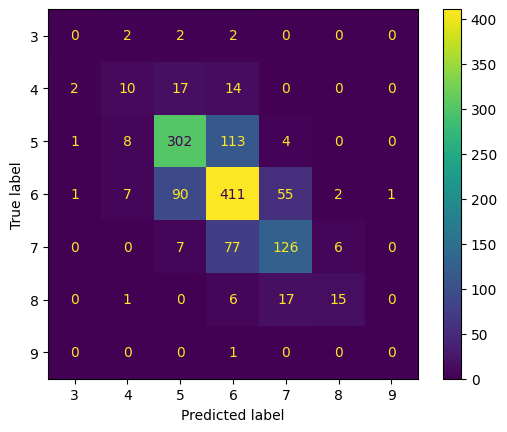

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test_class, lgbm_grid.best_estimator_.predict(X_test_class))

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

# No me ha dado tiempo a hacerlo. =(